In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore
from matplotlib import style

style.use("ggplot")

In [2]:
df = pd.read_csv('./student_data.csv').drop(['Unnamed: 0'], axis=1)
df

student_id  grade  attendance  study_hours  test_score
0           1.0     41          99           14        42.0
1           2.0     51          58            8        76.0
2           3.0     76          85            0        18.0
3           4.0     85          42            8         0.0
4           5.0     55          61            7        39.0
..          ...    ...         ...          ...         ...
995       996.0     38          41            1        73.0
996       997.0     30          57            1        28.0
997       998.0     60          91           13        13.0
998       999.0     46          39           10        50.0
999      1000.0     30          55           10        97.0

[1000 rows x 5 columns]

#### <b>Visualising</b> <br> Outliers present in attendace and test score i.e negative values and very high values

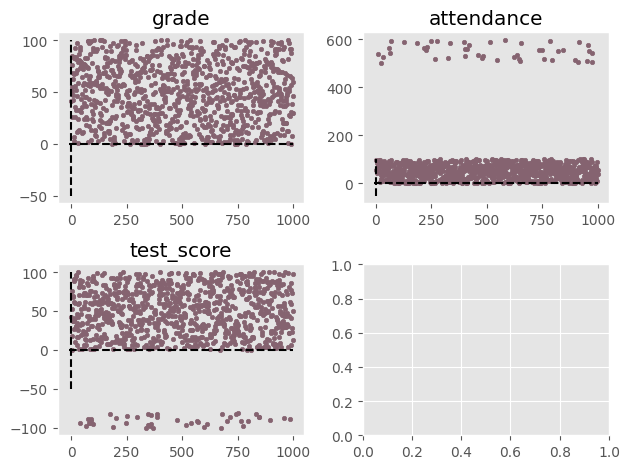

In [3]:
fig, axis = plt.subplots(2 , 2)
l = [(0 , 0) , (0,1) , (1,0)]
col = ['grade', 'attendance', 'test_score']
for k in range(3):
    i , j = l[k]
    col_name = col[k]
    axis[i,j].scatter(df['student_id'] , df[col_name], color='#856370', s = 10)
    axis[i,j].set_title(col_name)
    axis[i,j].grid()
    axis[i,j].plot((-10, 1000), (0, 0) , 'k--')
    axis[i,j].plot((0, 0), (-50, 100) , 'k--')
plt.tight_layout()


##### <b>Cleaning the data </b> <br> Dropping NaN values

In [4]:
df.dropna(inplace=True)
df

student_id  grade  attendance  study_hours  test_score
0           1.0     41          99           14        42.0
1           2.0     51          58            8        76.0
2           3.0     76          85            0        18.0
3           4.0     85          42            8         0.0
4           5.0     55          61            7        39.0
..          ...    ...         ...          ...         ...
995       996.0     38          41            1        73.0
996       997.0     30          57            1        28.0
997       998.0     60          91           13        13.0
998       999.0     46          39           10        50.0
999      1000.0     30          55           10        97.0

[952 rows x 5 columns]

##### <b> Handeling Outliers </b> <br> Calculating Z-Scores <br> Dropping rows which have z-score +-3SD

In [5]:
z_scores = df.apply(zscore).drop(['student_id'], axis=1)

z_scores
print(z_scores[z_scores > 3].count(), '\n')
print(z_scores[z_scores < -3].count())


grade           0
attendance     44
study_hours     0
test_score      0
dtype: int64 

grade           0
attendance      0
study_hours     0
test_score     46
dtype: int64


#### Drop Rows with Outliers

In [6]:
l1 = z_scores[z_scores['attendance'] > 3].index.tolist()
l2 = z_scores[z_scores['test_score'] < -3].index.tolist()

df.drop(l1, inplace = True)
df.drop(l2, inplace = True, errors='ignore')


#### Data is now cleaned

In [7]:
df

student_id  grade  attendance  study_hours  test_score
0           1.0     41          99           14        42.0
1           2.0     51          58            8        76.0
2           3.0     76          85            0        18.0
3           4.0     85          42            8         0.0
4           5.0     55          61            7        39.0
..          ...    ...         ...          ...         ...
995       996.0     38          41            1        73.0
996       997.0     30          57            1        28.0
997       998.0     60          91           13        13.0
998       999.0     46          39           10        50.0
999      1000.0     30          55           10        97.0

[864 rows x 5 columns]

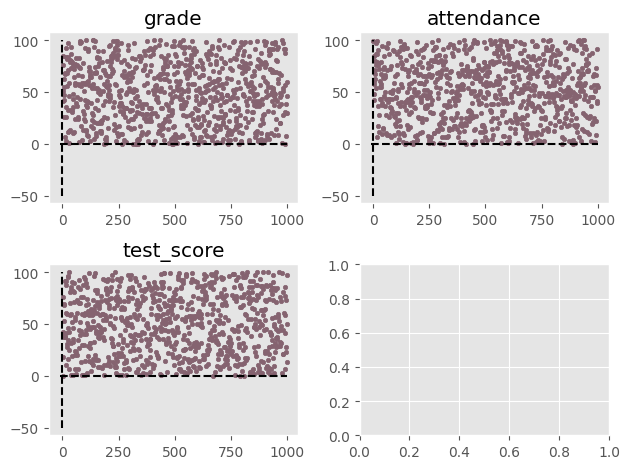

In [8]:
fig, axis = plt.subplots(2 , 2)

l = [(0 , 0) , (0,1) , (1,0)]
col = ['grade', 'attendance', 'test_score']
for k in range(3):
    i , j = l[k]
    col_name = col[k]
    axis[i,j].scatter(df['student_id'] , df[col_name], color='#856370', s = 10)
    axis[i,j].set_title(col_name)
    axis[i,j].grid()
    axis[i,j].plot((-10, 1000), (0, 0) , 'k--')
    axis[i,j].plot((0, 0), (-50, 100) , 'k--')
plt.tight_layout()